In [52]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağlayalım
drive.mount('/content/drive')

# Dosya yolunu okuyalım
file_path = '/content/drive/MyDrive/player/all_fifa_players.csv'
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleyelim
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Player,Position,League,Contract Start,Contract End,Age,Overall Score,Potential Score,Player ID,Height,...,International Reputation,Body Type,Real Face,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribbling/Reflexes,Defending/Pace,Physical/Positioning,Source_File
0,Luis Miguel Afonso Fernandes,"CM, RM, CAM, CAM",1. Division (Cyprus),2024.0,2025,34,75,75,197965,"177cm / 5'10""",...,3,Normal (170-185),Yes,58,72,77,76,61,58,combined_fifa_players_20241112_163726
1,Marcos Vinícius Sousa Natividade,"LM, LW, CAM, LM",1. Division (Cyprus),2022.0,2028,27,74+1,74+1,270478,"174cm / 5'9""",...,1,Lean (170-185),No,85,69,67,74,26,59,combined_fifa_players_20241112_163726
2,Vid Belec,"GK, GK",1. Division (Cyprus),2022.0,2027,34,73,73,193336,"193cm / 6'4""",...,1,Normal (185+),No,72,71,69,76,48,73,combined_fifa_players_20241112_163726
3,Youssef El Arabi,"ST, ST",1. Division (Cyprus),2024.0,2026,37,73,73,194209,"182cm / 6'0""",...,1,Normal (170-185),No,59,76,65,72,37,64,combined_fifa_players_20241112_163726
4,Max Meyer,"CAM, CM, CAM",1. Division (Cyprus),2024.0,2026,28,72,72,212150,"173cm / 5'8""",...,1,Normal (170-185),Yes,62,66,74,75,61,62,combined_fifa_players_20241112_163726


In [53]:
# Sütun isimlerini görelim
print(df.columns)

# Eksik veri kontrolü
print(df.isnull().sum())


Index(['Player', 'Position', 'League', 'Contract Start', 'Contract End', 'Age',
       'Overall Score', 'Potential Score', 'Player ID', 'Height', 'Weight',
       'Preferred Foot', 'Best Overall', 'Best Position', 'Growth',
       'Joined Team', 'Loan End', 'Value', 'Wage', 'Release Clause',
       'Total Attacking Score', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Total Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Total Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Total Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Total Mentality', 'Aggression', 'Interceptions',
       'Attack Position', 'Vision', 'Penalties', 'Composure',
       'Total Defending', 'Defensive Awareness', 'Standing Tackle',
       'Sliding tackle', 'Total Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats'

In [54]:
# Gereksiz sütunları çıkaralım
df = df.drop(['Player', 'Player ID', 'Source_File', 'Real Face', 'Body Type', 'Contract Start'], axis=1)

# Yeni veri yapısını kontrol edelim
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  37158 non-null  object 
 1   League                    37158 non-null  object 
 2   Contract End              37158 non-null  object 
 3   Age                       37158 non-null  int64  
 4   Overall Score             37158 non-null  object 
 5   Potential Score           37158 non-null  object 
 6   Height                    37158 non-null  object 
 7   Weight                    37158 non-null  object 
 8   Preferred Foot            37158 non-null  object 
 9   Best Overall              37158 non-null  int64  
 10  Best Position             37158 non-null  object 
 11  Growth                    37158 non-null  int64  
 12  Joined Team               37158 non-null  object 
 13  Loan End                  2384 non-null   object 
 14  Value 

In [55]:
df.drop(['Attacking Work Rate', 'Defensive Work Rate'], axis=1, inplace=True)


In [56]:
numeric_columns = df.columns[df.dtypes == 'object']
print(numeric_columns)


Index(['Position', 'League', 'Contract End', 'Overall Score',
       'Potential Score', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined Team', 'Loan End', 'Value', 'Wage',
       'Release Clause', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Aggression', 'Interceptions',
       'Attack Position', 'Vision', 'Penalties', 'Composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')


In [57]:
def convert_currency(value):
    if isinstance(value, str):  # Sadece stringlerde işlem yap
        if 'M' in value:
            return float(value.replace('€','').replace('M','')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('€','').replace('K','')) * 1_000
        else:
            return float(value.replace('€',''))
    return value  # Eğer zaten float ise, olduğu gibi döndür


In [58]:
columns_to_convert = ['Overall Score', 'Potential Score', 'Crossing', 'Finishing', 'Heading Accuracy',
                      'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
                      'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping',
                      'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Attack Position',
                      'Vision', 'Penalties', 'Composure', 'Defensive Awareness', 'Standing Tackle', 'Sliding tackle',
                      'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [59]:
def convert_height(height):
    if isinstance(height, float):  # Eğer değer float ise doğrudan döndür
        return height

    if 'cm' in height:
        return float(height.replace('cm', '').split('/')[0].strip())
    else:
        feet, inches = height.split("'")
        return round(int(feet) * 30.48 + int(inches) * 2.54)

df['Height'] = df['Height'].apply(convert_height)


In [60]:
def convert_weight(weight):
    try:
        # Eğer ağırlık 'kg' içeriyorsa, sadece kg değerini al
        if 'kg' in weight:
            return float(weight.replace('kg', '').strip())
        # Eğer ağırlık '/' içeriyorsa (örneğin '69 / 152lbs'), ilk değeri al
        elif '/' in weight:
            return float(weight.split('/')[0].strip())
        # Eğer doğrudan sayıysa, float olarak döndür
        else:
            return float(weight)
    except:
        return None  # Hatalı değerleri NaN olarak işaretle

df['Weight'] = df['Weight'].apply(convert_weight)



In [61]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37158 entries, 0 to 37157
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  37158 non-null  object 
 1   League                    37158 non-null  object 
 2   Contract End              37158 non-null  object 
 3   Age                       37158 non-null  int64  
 4   Overall Score             35374 non-null  float64
 5   Potential Score           34936 non-null  float64
 6   Height                    37158 non-null  float64
 7   Weight                    0 non-null      object 
 8   Preferred Foot            37158 non-null  object 
 9   Best Overall              37158 non-null  int64  
 10  Best Position             37158 non-null  object 
 11  Growth                    37158 non-null  int64  
 12  Joined Team               37158 non-null  object 
 13  Loan End                  2384 non-null   object 
 14  Value 

In [62]:
# Eksik verileri saydırma
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

Weight                 37158
Loan End               34774
Potential Score         2222
Overall Score           1784
Jumping                 1200
Ball Control            1170
Reactions               1060
Dribbling               1040
Short Passing            984
Stamina                  808
Vision                   792
Standing Tackle          786
Attack Position          768
Finishing                764
Interceptions            758
Acceleration             726
Long Passing             718
Sprint Speed             690
Defensive Awareness      684
Crossing                 628
Strength                 610
Sliding tackle           574
Composure                554
Shot Power               552
Agility                  536
Aggression               514
Heading Accuracy         506
Long Shots               498
Curve                    348
Balance                  314
Volleys                  276
FK Accuracy              204
Penalties                160
GK Diving                134
GK Reflexes   

In [63]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Loan End sütununu çıkarma
df = df.drop(columns=['Loan End'])

# Sayısal ve kategorik sütunları ayırma
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Sayısal verileri ortalama ile doldurma
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Kategorik verileri mod ile doldurma
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Eksik veriler dolduruldu ve Loan End sütunu çıkarıldı.")


Eksik veriler dolduruldu ve Loan End sütunu çıkarıldı.


In [64]:
print(df.dtypes)  # Veri tiplerini gör
print(df.select_dtypes(include=['object']).head())  # Kategorik sütunların ilk 5 satırını gör


Position                 object
League                   object
Contract End             object
Age                     float64
Overall Score           float64
                         ...   
Shooting/Handling       float64
Passing/Kicking         float64
Dribbling/Reflexes      float64
Defending/Pace          float64
Physical/Positioning    float64
Length: 68, dtype: object
           Position                League Contract End Weight Preferred Foot  \
0  CM, RM, CAM, CAM  1. Division (Cyprus)         2025   None          Right   
1   LM, LW, CAM, LM  1. Division (Cyprus)         2028   None          Right   
2            GK, GK  1. Division (Cyprus)         2027   None          Right   
3            ST, ST  1. Division (Cyprus)         2026   None          Right   
4      CAM, CM, CAM  1. Division (Cyprus)         2026   None          Right   

  Best Position   Joined Team  Value  Wage Release Clause  
0           CAM   Sep 7, 2024  €2.6M  €27K          €5.7M  
1            LM   Jul

In [65]:
df = pd.get_dummies(df, columns=['Position'], drop_first=True)



In [66]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # Kategorik değerleri string'e çevir

In [67]:
print(df.dtypes)


League                       int64
Contract End                 int64
Age                        float64
Overall Score              float64
Potential Score            float64
                            ...   
Position_ST, RW, RM, RW       bool
Position_ST, RW, RM, ST       bool
Position_ST, RW, RW           bool
Position_ST, RW, ST           bool
Position_ST, ST               bool
Length: 1371, dtype: object


In [68]:
df_best_position = pd.get_dummies(df['Best Position'], prefix='Position')
df = pd.concat([df, df_best_position], axis=1)
df.drop(columns=['Best Position'], inplace=True)  # Orijinal sütunu silebiliriz



In [69]:
# 1. Fiziksel Güç (Strength, Stamina, Jumping, Balance)
physical_cols = [col for col in ["Strength", "Stamina", "Jumping", "Balance"] if col in df.columns]
df["Physical_Strength"] = df[physical_cols].mean(axis=1)

# 2. Şut Yeteneği (Finishing, Shot Power, Long Shots, Volleys, FK Accuracy)
shooting_cols = [col for col in ["Finishing", "Shot Power", "Long Shots", "Volleys", "FK Accuracy"] if col in df.columns]
df["Shooting_Skill"] = df[shooting_cols].mean(axis=1)

# 3. Pas Yeteneği (Short Passing, Long Passing, Vision, Curve, Crossing)
passing_cols = [col for col in ["Short Passing", "Long Passing", "Vision", "Curve", "Crossing"] if col in df.columns]
df["Passing_Skill"] = df[passing_cols].mean(axis=1)

# 4. Savunma Yeteneği (Defensive Awareness, Standing Tackle, Interceptions, Sliding Tackle)
defense_cols = [col for col in ["Defensive Awareness", "Standing Tackle", "Interceptions", "Sliding Tackle"] if col in df.columns]
df["Defensive_Skill"] = df[defense_cols].mean(axis=1)

# 5. Hücum Zekası (Dribbling, Composure, Ball Control, Skill Moves)
attacking_cols = [col for col in ["Dribbling", "Composure", "Ball Control", "Skill Moves"] if col in df.columns]
df["Attacking_Skill"] = df[attacking_cols].mean(axis=1)

# 6. Hız Yeteneği (Sprint Speed, Acceleration)
speed_cols = [col for col in ["Sprint Speed", "Acceleration"] if col in df.columns]
df["Speed"] = df[speed_cols].mean(axis=1)

# Kullanılan sütunları silelim
columns_to_drop = physical_cols + shooting_cols + passing_cols + defense_cols + attacking_cols + speed_cols
df = df.drop(columns=columns_to_drop)



In [70]:
df["Best Position"] = df[[col for col in df.columns if "Position_" in col]].idxmax(axis=1)
df["Best Position"] = df["Best Position"].str.replace("Position_", "")



In [71]:
# 1. Mevkilere göre ortalama özellikleri hesapla
position_means = df.groupby("Best Position").mean()

# 2. Her oyuncunun kendi mevki ortalamasından farkını hesapla
df_diff = df.copy()
for col in position_means.columns:
    df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])

# 3. Sonuçları kontrol edelim
df_diff.head()



<ipython-input-71-83d906b42419>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])
<ipython-input-71-83d906b42419>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])
<ipython-input-71-83d906b42419>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

,League,Contract End,Age,Overall Score,Potential Score,Height,Weight,Preferred Foot,Best Overall,Growth,...,Position_11_diff,Position_12_diff,Position_13_diff,Position_14_diff,Physical_Strength_diff,Shooting_Skill_diff,Passing_Skill_diff,Defensive_Skill_diff,Attacking_Skill_diff,Speed_diff
0,0,1,34.0,75.000000,75.000000,177.0,0,1,76.0,0.0,...,0.0,0.0,0.0,0.0,-5.821429,9.192804,7.360554,6.840547,7.652197,-9.642857
1,0,4,27.0,65.548256,70.849038,174.0,0,1,74.0,0.0,...,0.0,0.0,0.0,0.0,5.333333,0.243693,1.241822,-16.518519,2.944444,7.444444
2,0,3,34.0,73.000000,73.000000,193.0,0,1,73.0,0.0,...,0.0,0.0,0.0,0.0,-2.350925,1.988052,1.390467,3.306071,8.679534,12.169373
3,0,2,37.0,73.000000,73.000000,182.0,0,1,73.0,0.0,...,0.0,0.0,0.0,0.0,-3.424586,14.826828,14.151687,7.340517,7.554701,-8.453064
4,0,2,28.0,72.000000,72.000000,173.0,0,1,72.0,0.0,...,0.0,0.0,0.0,0.0,4.804238,7.458909,10.971095,17.185261,6.067892,-3.298164


In [72]:
# 1. Mevkilere göre ortalama özellikleri hesapla (Best Position baz alınarak)
position_means = df.groupby("Best Position").mean()

# 2. Her oyuncunun kendi mevki ortalamasından farkını hesapla
df_diff = df.copy()
for col in position_means.columns:
    df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])

# 3. "_diff" ile biten sütunları ana tabloya ekle
diff_columns = [col for col in df_diff.columns if "_diff" in col]
df[diff_columns] = df_diff[diff_columns]

# 4. Sonuçları kontrol et
print([col for col in df.columns if "diff" in col.lower()])


<ipython-input-72-87a988ce7efc>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])
<ipython-input-72-87a988ce7efc>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_diff[col + "_diff"] = df[col] - df["Best Position"].map(position_means[col])
<ipython-input-72-87a988ce7efc>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

['League_diff', 'Contract End_diff', 'Age_diff', 'Overall Score_diff', 'Potential Score_diff', 'Height_diff', 'Weight_diff', 'Preferred Foot_diff', 'Best Overall_diff', 'Growth_diff', 'Joined Team_diff', 'Value_diff', 'Wage_diff', 'Release Clause_diff', 'Total Attacking Score_diff', 'Heading Accuracy_diff', 'Total Skill_diff', 'Total Movement_diff', 'Agility_diff', 'Reactions_diff', 'Total Power_diff', 'Total Mentality_diff', 'Aggression_diff', 'Attack Position_diff', 'Penalties_diff', 'Total Defending_diff', 'Sliding tackle_diff', 'Total Goalkeeping_diff', 'GK Diving_diff', 'GK Handling_diff', 'GK Kicking_diff', 'GK Positioning_diff', 'GK Reflexes_diff', 'Total Stats_diff', 'Base Stats_diff', 'Weak Foot_diff', 'International Reputation_diff', 'Pace/Diving_diff', 'Shooting/Handling_diff', 'Passing/Kicking_diff', 'Dribbling/Reflexes_diff', 'Defending/Pace_diff', 'Physical/Positioning_diff', 'Position_CAM, CDM_diff', 'Position_CAM, CDM, CAM_diff', 'Position_CAM, CDM, CM_diff', 'Position_

<ipython-input-72-87a988ce7efc>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[diff_columns] = df_diff[diff_columns]
<ipython-input-72-87a988ce7efc>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[diff_columns] = df_diff[diff_columns]
<ipython-input-72-87a988ce7efc>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [73]:
# 1. Kullanışsız sütunları belirleyelim
excluded_columns = [
    "Wage_diff", "Release Clause_diff", "Joined Team_diff", "Value_diff", "Contract End_diff",
    "Overall Score_diff", "Potential Score_diff", "Height_diff", "Weight_diff", "Preferred Foot_diff"
]

# 2. Kullanışsız sütunları çıkartarak sadece beceri ile ilgili fark sütunlarını alalım
diff_columns_filtered = [col for col in df.columns if col.endswith("_diff") and col not in excluded_columns]

# 3. Güncellenmiş beceri sütunları ile en iyi 3 özelliği tekrar hesaplayalım
df["Top_3_Skills"] = df[diff_columns_filtered].apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# 4. Sonuçları inceleyelim ("Best Position" baz alındı)
df[["Best Position", "Top_3_Skills"]].head()


<ipython-input-73-23110b28bc1d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Top_3_Skills"] = df[diff_columns_filtered].apply(lambda x: x.nlargest(3).index.tolist(), axis=1)


,Best Position,Top_3_Skills
0,"CM, RM, CAM, CAM","[Total Stats_diff, Total Skill_diff, Total Men..."
1,"LM, LW, CAM, LM","[Total Stats_diff, Total Power_diff, Total Att..."
2,"GK, GK","[Total Stats_diff, Base Stats_diff, Total Move..."
3,"ST, ST","[Total Stats_diff, Total Skill_diff, Total Att..."
4,"CAM, CM, CAM","[Total Stats_diff, Total Mentality_diff, Total..."


In [74]:
# 1. Genel ve toplam skorları içeren sütunları belirleyelim
excluded_columns += [
    "Total Stats_diff", "Base Stats_diff", "Total Skill_diff", "Total Attacking Score_diff",
    "Total Mentality_diff", "Total Movement_diff", "Total Power_diff", "Total Defending_diff",
    "Total Goalkeeping_diff", "Position_diff"
]

# 2. Sadece becerileri içeren fark sütunlarını filtreleyelim
diff_columns_filtered = [col for col in df.columns if col.endswith("_diff") and col not in excluded_columns]

# 3. Güncellenmiş beceri sütunları ile en iyi 3 özelliği tekrar hesaplayalım
df["Top_3_Skills"] = df[diff_columns_filtered].apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# 4. Sonuçları inceleyelim ("Best Position" baz alındı)
df[["Best Position", "Top_3_Skills"]].head()


,Best Position,Top_3_Skills
0,"CM, RM, CAM, CAM","[Penalties_diff, Attack Position_diff, Shootin..."
1,"LM, LW, CAM, LM","[Aggression_diff, Heading Accuracy_diff, Shoot..."
2,"GK, GK","[Agility_diff, Defending/Pace_diff, Reactions_..."
3,"ST, ST","[Sliding tackle_diff, Penalties_diff, Shooting..."
4,"CAM, CM, CAM","[Defensive_Skill_diff, Aggression_diff, Slidin..."


In [75]:
df = df.loc[:, ~df.columns.duplicated()]



In [81]:
import pandas as pd
from scipy.stats import zscore

# 1. "_diff" içeren sütunları seçelim
diff_columns = [col for col in df.columns if "_diff" in col]

# Eğer diff_columns boşsa hata vermeden uyarı verelim
if not diff_columns:
    raise ValueError("HATA: '_diff' içeren sütun bulunamadı. Lütfen veri setini kontrol et!")

# 2. Daha önce eklenmiş "Z_Score" ve "Anomaly" sütunlarını temizleyelim
df = df.drop(columns=["Z_Score", "Anomaly"], errors="ignore")

# 3. Z-Score hesaplayalım (axis=0 olacak, böylece sütun bazında normalize ederiz)
z_scores = df[diff_columns].apply(zscore, axis=0).abs().max(axis=1)

# 4. Z-Score'u 2.5'ten büyük olanları anormal olarak işaretleyelim
df["Z_Score"] = z_scores
df["Anomaly"] = df["Z_Score"] > 2.5

# 5. "Best Position" sütunundaki ilk pozisyonu alalım
df["Primary Position"] = df["Best Position"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

# 6. Anormal oyuncuları görüntüleyelim
df_anomalies = df[df["Anomaly"]].copy()
df_anomalies = df_anomalies[["Primary Position", "Z_Score"]].reset_index(drop=True)

print(df_anomalies.head())


  Primary Position   Z_Score
0               CM  3.906673
1               GK  3.141127
2               ST  2.681820
3               CB  3.367235
4              CDM  2.713775


In [84]:
threshold = 4.0  # Yeni eşik değeri
df["Anomaly"] = df["Z_Score"] > threshold
df_anomalies = df[df["Anomaly"]][["Primary Position", "Z_Score"]].sort_values(by="Z_Score", ascending=False)
print(df_anomalies.head(20))


      Primary Position    Z_Score
12075               GK  10.725423
25160               GK  10.725423
6580                GK  10.725423
6581                GK  10.725423
30654               GK  10.725423
25159               GK  10.725423
30652               CB  10.724357
12080               CB  10.724357
30659               CB  10.724357
12073               CB  10.724357
20469               ST  10.691757
30649               ST  10.691757
33704               ST  10.691757
15125               ST  10.691757
25163               ST  10.691757
1890                ST  10.691757
6584                ST  10.691757
12070               ST  10.691757
25156               ST  10.659001
6577                ST  10.659001


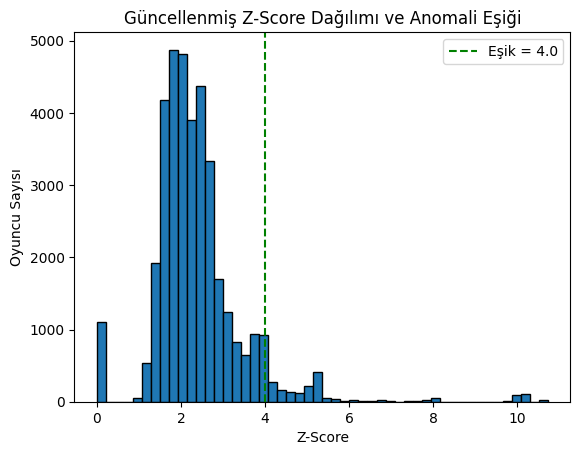

In [85]:
plt.hist(df["Z_Score"], bins=50, edgecolor="black")
plt.axvline(4.0, color="green", linestyle="dashed", label="Eşik = 4.0")
plt.xlabel("Z-Score")
plt.ylabel("Oyuncu Sayısı")
plt.legend()
plt.title("Güncellenmiş Z-Score Dağılımı ve Anomali Eşiği")
plt.show()



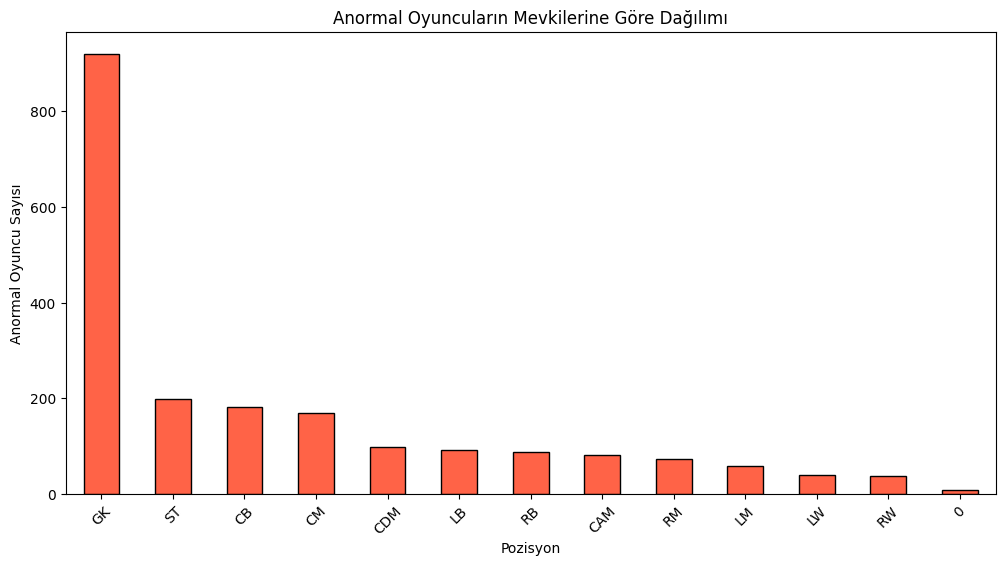

In [87]:
plt.figure(figsize=(12, 6))
df_anomalies["Primary Position"].value_counts().plot(kind="bar", color="tomato", edgecolor="black")
plt.xlabel("Pozisyon")
plt.ylabel("Anormal Oyuncu Sayısı")
plt.title("Anormal Oyuncuların Mevkilerine Göre Dağılımı")
plt.xticks(rotation=45)
plt.show()


In [93]:
print(df.columns)


Index(['League', 'Contract End', 'Age', 'Overall Score', 'Potential Score',
       'Height', 'Weight', 'Preferred Foot', 'Best Overall', 'Growth',
       ...
       'Physical_Strength_diff', 'Shooting_Skill_diff', 'Passing_Skill_diff',
       'Defensive_Skill_diff', 'Attacking_Skill_diff', 'Speed_diff',
       'Top_3_Skills', 'Primary Position', 'Z_Score', 'Anomaly'],
      dtype='object', length=2741)


In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 🔹 Anormal oyuncuları seçelim
anomaly_players = df[df["Anomaly"] == 1].copy()

# 🔹 Kalecileri hariç tutalım
anomaly_players = anomaly_players[anomaly_players["Primary Position"] != "GK"]

# 🔹 Growth_diff içeren özellikleri Top_3_Skills'ten temizleyelim
anomaly_players["Top_3_Skills"] = anomaly_players["Top_3_Skills"].apply(
    lambda skills: [s for s in skills if "Growth_diff" not in s]
)

# 🔹 Eğer oyuncunun Top_3_Skills listesi 3'ten küçükse, eksik özellikleri tamamlayalım
def fill_missing_skills(row):
    if len(row["Top_3_Skills"]) < 3:
        # Tüm fark skorlarını sırala ve en büyük olanları seç
        skill_values = {
            "Physical_Strength_diff": row["Physical_Strength_diff"],
            "Shooting_Skill_diff": row["Shooting_Skill_diff"],
            "Passing_Skill_diff": row["Passing_Skill_diff"],
            "Defensive_Skill_diff": row["Defensive_Skill_diff"],
            "Attacking_Skill_diff": row["Attacking_Skill_diff"],
            "Speed_diff": row["Speed_diff"]
        }

        # Growth_diff olmayan özellikleri en büyükten küçüğe sırala
        sorted_skills = sorted(skill_values, key=skill_values.get, reverse=True)

        # Eksik olan en iyi özellikleri ekleyelim
        while len(row["Top_3_Skills"]) < 3:
            for skill in sorted_skills:
                if skill not in row["Top_3_Skills"]:
                    row["Top_3_Skills"].append(skill)
                    break

    return row["Top_3_Skills"]

# 🔹 Eksik özellikleri tamamlayalım
anomaly_players["Top_3_Skills"] = anomaly_players.apply(fill_missing_skills, axis=1)

# 🔹 Model için kullanılacak özellikler (Growth_diff tamamen çıkarıldı)
features = [
    "Physical_Strength_diff", "Shooting_Skill_diff", "Passing_Skill_diff",
    "Defensive_Skill_diff", "Attacking_Skill_diff", "Speed_diff", "Z_Score"
]

# 🔹 Özellikleri ölçekleyelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(anomaly_players[features])

# 🔹 Kümeleme modeli
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
anomaly_players["Cluster"] = kmeans.fit_predict(X_scaled)

# 🔹 Mevki önerme fonksiyonu
def suggest_position(row):
    skill_scores = {
        "ST": row["Shooting_Skill_diff"] + row["Attacking_Skill_diff"],
        "CM": row["Passing_Skill_diff"] + row["Physical_Strength_diff"],
        "CB": row["Defensive_Skill_diff"] + row["Physical_Strength_diff"],
        "LW": row["Speed_diff"] + row["Attacking_Skill_diff"],
        "RB": row["Speed_diff"] + row["Defensive_Skill_diff"],
        "CDM": row["Passing_Skill_diff"] + row["Defensive_Skill_diff"]
    }

    # 🔹 En yüksek skoru alan mevkiyi öner
    suggested_position = max(skill_scores, key=skill_scores.get)

    return suggested_position

# 🔹 Önerilen mevki sütunu ekleyelim
anomaly_players["Suggested Position"] = anomaly_players.apply(suggest_position, axis=1)

# 🔹 Sonuçları görelim
print(anomaly_players[["Primary Position", "Top_3_Skills", "Z_Score", "Suggested Position"]].head())


    Primary Position                                       Top_3_Skills  \
434               RB  [GK Reflexes_diff, Agility_diff, Attacking_Ski...   
487               LB  [Weak Foot_diff, Position_CAM, CDM_diff, Speed...   
489               ST    [Aggression_diff, Pace/Diving_diff, Speed_diff]   
514               LB  [GK Reflexes_diff, GK Positioning_diff, Speed_...   
529              CDM  [Speed_diff, Pace/Diving_diff, Attacking_Skill...   

      Z_Score Suggested Position  
434  4.095588                CDM  
487  4.077553                 LW  
489  4.012305                 RB  
514  4.045324                 LW  
529  4.278653                 LW  


In [105]:
import pickle

# 🔹 Modeli kaydet
with open("player_position_modelv1.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# 🔹 Ölçekleyiciyi kaydet
with open("scalerv1.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model ve scaler başarıyla kaydedildi!")


✅ Model ve scaler başarıyla kaydedildi!
